# Modeling & Machine Learning Problems

Traditional machine learning and modeling approaches face several key challenges:

## 1. Precision & Complexity
- Models often struggle to achieve high precision on complex tasks
- Trade-off between model simplicity and accuracy
- Difficulty in capturing subtle patterns and nuances in data
- Limited ability to generalize well to unseen examples


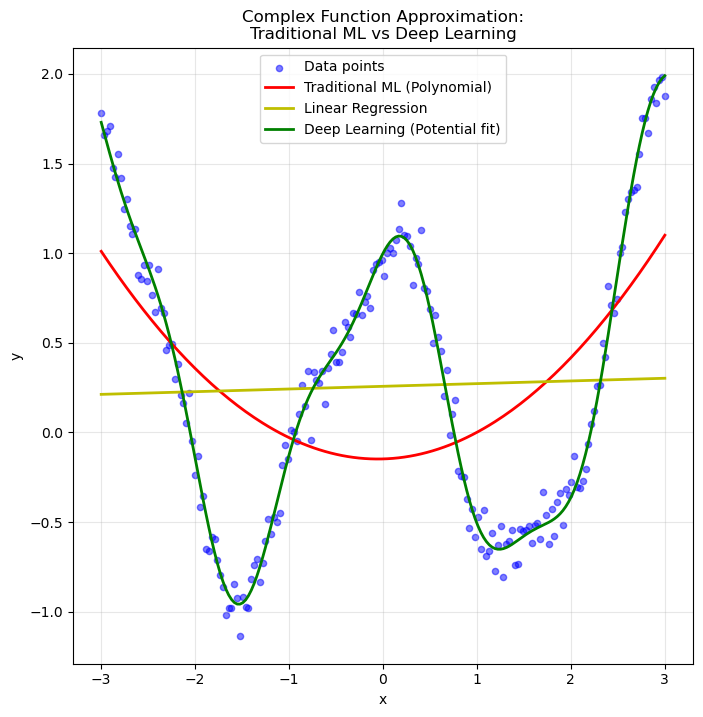

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Generate complex data
np.random.seed(42)
x = np.linspace(-3, 3, 200)
y = 0.2 * np.sin(5*x) + np.cos(2*x) + 0.1*x**2 + np.random.normal(0, 0.1, 200)

# Fit a simple polynomial and linear model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Simple polynomial regression
simple_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
simple_model.fit(x.reshape(-1, 1), y)
y_simple = simple_model.predict(x.reshape(-1, 1))

# Linear regression
linear_model = LinearRegression()
linear_model.fit(x.reshape(-1, 1), y)
y_linear = linear_model.predict(x.reshape(-1, 1))

# Create plot
plt.figure(figsize=(8, 8))

# Plot original data
plt.scatter(x, y, color='blue', alpha=0.5, label='Data points', s=20)

# Plot simple model predictions
plt.plot(x, y_simple, 'r-', label='Traditional ML (Polynomial)', linewidth=2)
plt.plot(x, y_linear, 'y-', label='Linear Regression', linewidth=2)

# Plot "theoretical" complex function that DL could fit
y_complex = 0.2 * np.sin(5*x) + np.cos(2*x) + 0.1*x**2
plt.plot(x, y_complex, 'g-', label='Deep Learning (Potential fit)', linewidth=2)

plt.title('Complex Function Approximation:\nTraditional ML vs Deep Learning')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## 2. Feature Engineering 
- Requires extensive domain expertise and manual effort
- Time-consuming process of identifying relevant features
- Risk of missing important features or creating redundant ones
- Features may not capture complex relationships in data
- Handcrafted features can be brittle and dataset-specific

 Let's examine feature engineering challenges in Computer Vision:
 
 Traditional Computer Vision Approaches:
 - Requires manual design of feature extractors and filters
   * Edge detection (Sobel, Canny)
   * Corner detection (Harris, FAST)
   * Blob detection (SIFT, SURF)
   * Texture descriptors (HOG, LBP)
 
 Key Limitations:
 - Extensive domain expertise needed to select appropriate features
 - Time-consuming parameter tuning (kernel sizes, thresholds, etc.)
 - Hand-crafted features may fail to capture subtle patterns
 - Features optimized for one task (e.g. face detection) may fail on others
 - Difficulty handling variations in:
   * Lighting conditions
   * Object orientation
   * Scale changes
   * Occlusions
 
 Impact on Development:
 - Significant engineering effort for each new vision task
 - Limited generalization across different domains
 - High maintenance cost when conditions change
 - Risk of missing important visual patterns






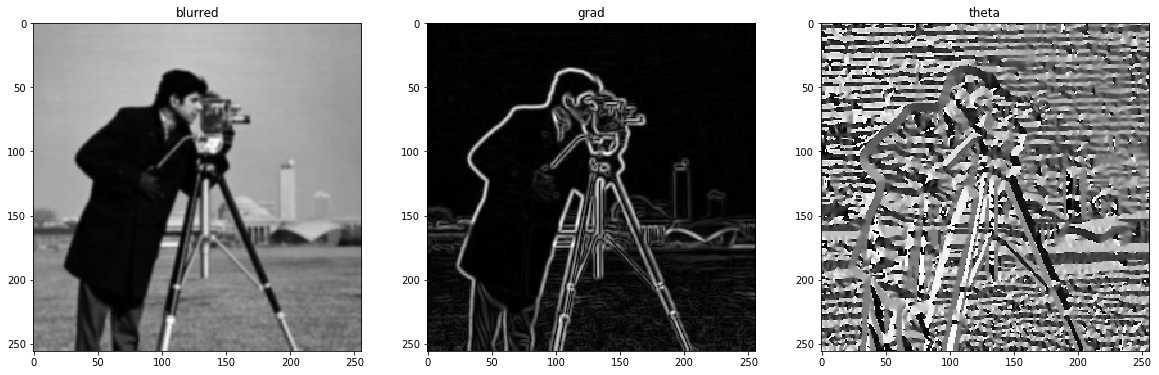

In [15]:
# Example of Traditional Feature Engineering: Canny Edge Detection
from IPython.display import Image
Image(filename='resources/canny.png', width=800)


## 3. Non-linear Problems
Many real-world problems are inherently non-linear, meaning they cannot be solved using simple linear models. Examples include:

- XOR Problem (shown below): A classic example where linear classifiers fail
- Image Recognition: Objects have complex, non-linear relationships between pixels
- Natural Language: Semantic meaning emerges from non-linear combinations of words
- Financial Markets: Price movements follow complex, non-linear patterns

Traditional ML approaches often struggle with non-linear problems:
- Linear models (e.g., logistic regression) cannot capture non-linear decision boundaries
- Simple feature transformations may not be sufficient
- Kernel methods can help but don't scale well to high dimensions

Deep Learning excels at non-linear problems because:
- Multiple layers create complex non-linear transformations
- Activation functions introduce non-linearity at each layer
- Automatic feature learning adapts to the problem's non-linear nature

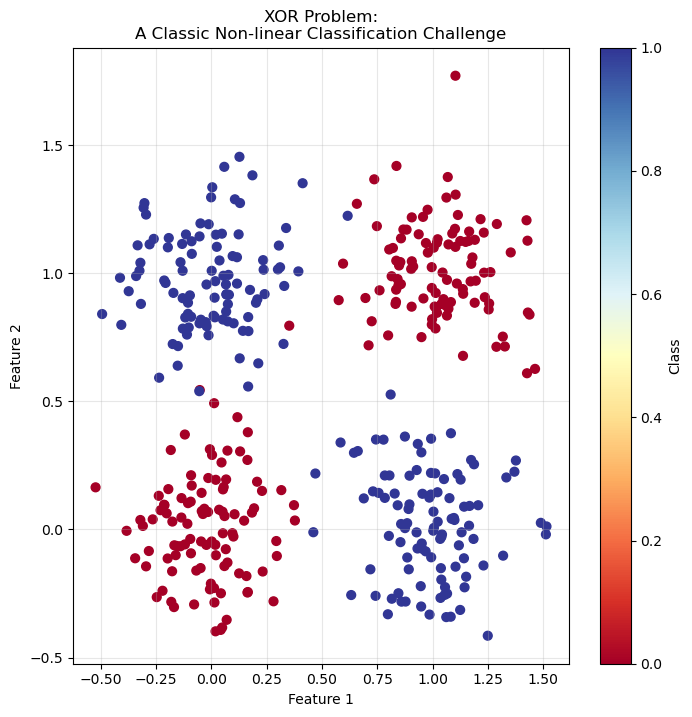

In [11]:



# Create XOR dataset
def create_xor_data(points_per_class=100, noise=0.1):
    # Generate points for each class of XOR
    X = []
    y = []
    
    # Class 0: (0,0) and (1,1)
    X.append(np.random.normal(0, noise, (points_per_class, 2)))
    X.append(np.random.normal(1, noise, (points_per_class, 2)))
    y.extend([0] * (2 * points_per_class))
    
    # Class 1: (0,1) and (1,0) 
    X.append(np.random.normal([0,1], noise, (points_per_class, 2)))
    X.append(np.random.normal([1,0], noise, (points_per_class, 2)))
    y.extend([1] * (2 * points_per_class))
    
    return np.vstack(X), np.array(y)

# Generate XOR data
X, y = create_xor_data(noise=0.2)

# Create the plot
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, s=40)
plt.title('XOR Problem:\nA Classic Non-linear Classification Challenge')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.grid(True, alpha=0.3)
plt.show()


 # Why Deep Learning?
 
 Deep Learning has revolutionized the field of artificial intelligence by providing powerful solutions to complex problems that traditional machine learning methods struggle to solve. Let's explore the mathematical foundations that make deep learning necessary and powerful:
 
 ## 1. Universal Function Approximation
Deep neural networks are proven universal function approximators, based on the Universal Approximation Theorem. This means they can approximate any continuous function $f: \mathbb{R}^n \rightarrow \mathbb{R}^m$ with arbitrary precision, given sufficient depth and width.



Epoch [1/10000], Loss: 0.1791
Epoch [10/10000], Loss: 0.1539
Epoch [100/10000], Loss: 0.0327
Epoch [5000/10000], Loss: 0.0002
Epoch [10000/10000], Loss: 0.0028


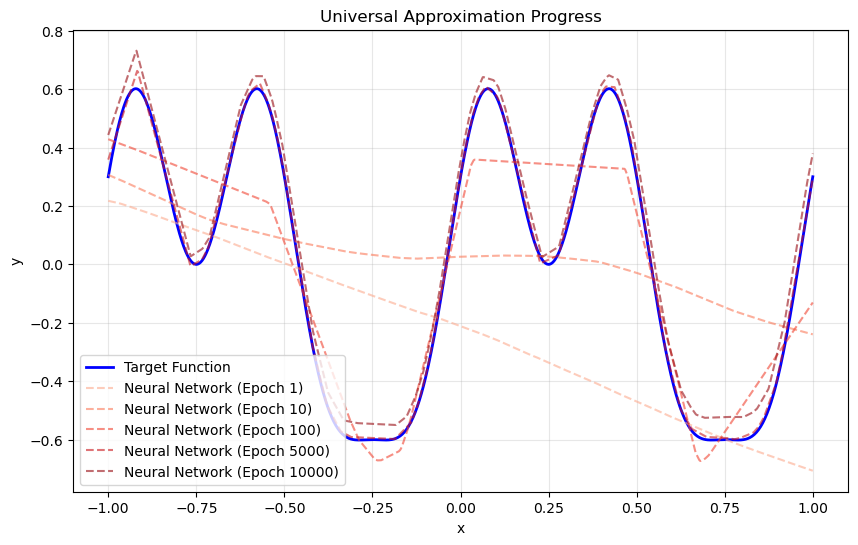

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# Create a complex function to approximate
def target_function(x):
    return 0.5 * np.sin(2 * np.pi * x) + 0.3 * np.cos(4 * np.pi * x) + 0.2 * np.sin(6 * np.pi * x)

# Create training data
X = np.linspace(-1, 1, 1000).reshape(-1, 1)
y = target_function(X)

# Convert to PyTorch tensors
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y)

# Define a simple neural network
class UniversalApproximator(nn.Module):
    def __init__(self, hidden_size=64):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(1, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 1)
        )
    
    def forward(self, x):
        return self.network(x)

# Initialize model, loss function, and optimizer
model = UniversalApproximator()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Create figure for plotting
plt.figure(figsize=(10, 6))
plt.plot(X, y, label='Target Function', color='blue', linewidth=2)

# Train the model and plot intermediate steps
epochs = 10000
plot_intervals = [1, 10, 100, 5000, 10000]  
colors = plt.cm.Reds(np.linspace(0.3, 0.9, len(plot_intervals))) 

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(X_tensor)
    loss = criterion(y_pred, y_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) in plot_intervals:
        with torch.no_grad():
            y_pred = model(X_tensor).numpy()
        color_idx = plot_intervals.index(epoch + 1)
        plt.plot(X, y_pred, 
                label=f'Neural Network (Epoch {epoch+1})', 
                color=colors[color_idx], 
                linestyle='--',
                alpha=0.6)
        plt.title('Universal Approximation Progress')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.grid(True, alpha=0.3)
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

plt.show()  # Show the final plot


## 2. Hierarchical Feature Learning Through multiple layers, networks automatically learn hierarchical representations:
 - Layer 1: Basic features (edges, colors)
 - Layer 2: Simple patterns
 - Layer 3: Complex patterns
 - Deeper layers: Abstract concepts
 
 This hierarchical learning is mathematically represented as a composition of functions:
 $f(x) = f_n(f_{n-1}(...f_1(x)))$
 
 ## 3. Non-linear Transformations
 Deep networks model complex non-linear relationships through activation functions:
 - ReLU: $f(x) = max(0,x)$
 - Sigmoid: $\sigma(x) = \frac{1}{1 + e^{-x}}$
 - Tanh: $tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$
 
 ## 4. Dimensionality and Complexity
 - Handles high-dimensional data through efficient representations
 - Reduces dimensionality naturally: $\mathbb{R}^n \rightarrow \mathbb{R}^m$ where $m < n$
 - Learns complex decision boundaries that separate data in high-dimensional spaces
 
 ## 5. Optimization Advantages
 - Gradient-based learning enables efficient parameter updates
 - Backpropagation algorithm: $\frac{\partial L}{\partial w} = \frac{\partial L}{\partial y}\frac{\partial y}{\partial w}$
 - Stochastic optimization methods handle large-scale problems
 
 ## 6. Statistical Learning Theory
 Deep learning addresses the bias-variance tradeoff through:
 - Regularization techniques
 - Dropout: Random network pruning
 - Batch normalization: $\hat{x} = \frac{x - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}}$
 
 In this notebook, we'll dive deeper into these mathematical concepts and understand how they make deep learning an essential tool for modern machine learning applications. We'll explore practical implementations and see these principles in action.